In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
# Series.plot.FUNCTION(...)
# DataFrame.plot.FUNCTION(...)
#
# FUNCTIONS:
#  - TODAY: pie, scatter
#  - LATER: bar, barh, line, ...

In [3]:
s = Series([50,30,20])
s

0    50
1    30
2    20
dtype: int64

In [4]:
%matplotlib inline

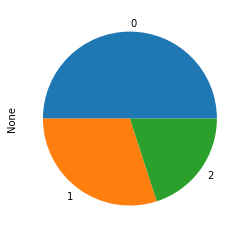

In [5]:
s.plot.pie()

In [6]:
s

0    50
1    30
2    20
dtype: int64

In [7]:
s = Series([50,30,20], index=["Police", "Fire", "Streets"])
s

Police     50
Fire       30
Streets    20
dtype: int64

In [8]:
5 % 2 # modulo operator

1

In [9]:
# format_str % VALUE
"%d" % 3.14

'3'

In [10]:
"%f" % 3.14

'3.140000'

In [11]:
"$%.1f" % 3.14

'$3.1'

In [12]:
5 + 2 # addition
"A" + "B" # series concatenation

'AB'

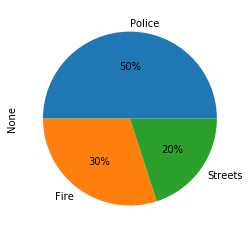

In [13]:
s.plot.pie(autopct="%d%%")

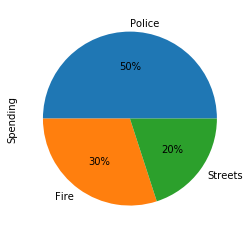

In [14]:
s = Series([50,30,20], index=["Police", "Fire", "Streets"], name="Spending")
s.plot.pie(autopct="%d%%")

In [15]:
import matplotlib
matplotlib.rcParams["font.size"] = 16

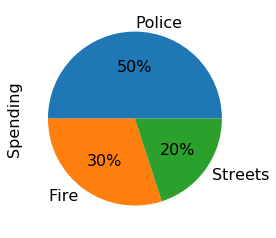

In [16]:
# TODO: use white font on dark backgrounds
s = Series([50,30,20], index=["Police", "Fire", "Streets"], name="Spending")
s.plot.pie(autopct="%d%%")

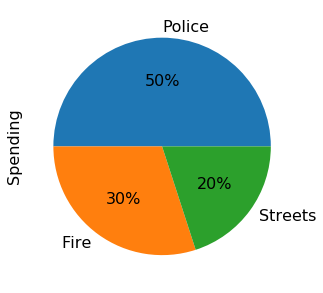

In [17]:
# TODO: use white font on dark backgrounds
s = Series([50,30,20], index=["Police", "Fire", "Streets"], name="Spending")
s.plot.pie(autopct="%d%%", figsize=(5, 5))

In [18]:
s = Series([0.4,0.2,0.1], index=["Police", "Fire", "Streets"], name="Spending")
s

Police     0.4
Fire       0.2
Streets    0.1
Name: Spending, dtype: float64

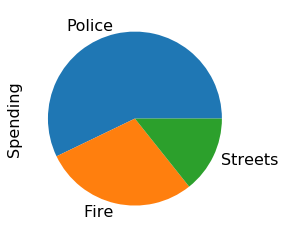

In [19]:
# Series.plot.pie(...)
(s / sum(s)).plot.pie()

In [20]:
import sqlite3
conn = sqlite3.connect("bus.db")
conn

In [21]:
pd.read_sql("SELECT * FROM sqlite_master", conn)

,type,name,tbl_name,rootpage,sql
0,table,boarding,boarding,2,"CREATE TABLE ""boarding"" (\n""index"" INTEGER,\n ..."
1,index,ix_boarding_index,boarding,3,"CREATE INDEX ""ix_boarding_index""ON ""boarding"" ..."
2,table,routes,routes,55,"CREATE TABLE ""routes"" (\n""index"" INTEGER,\n ""..."
3,index,ix_routes_index,routes,57,"CREATE INDEX ""ix_routes_index""ON ""routes"" (""in..."


In [22]:
pd.read_sql("SELECT * FROM boarding LIMIT 3", conn)

,index,StopID,Route,Lat,Lon,DailyBoardings
0,0,1163,27,43.073655,-89.385427,1.03
1,1,1163,47,43.073655,-89.385427,0.11
2,2,1163,75,43.073655,-89.385427,0.34


In [23]:
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS ridership
FROM boarding
GROUP BY Route
""", conn)
df.head()

,Route,ridership
0,1,181.44
1,2,4808.03
2,3,2708.55
3,4,2656.99
4,5,1634.69


In [24]:
df.set_index("Route", inplace=True)
df.head()

,ridership
Route,
1,181.44
2,4808.03
3,2708.55
4,2656.99
5,1634.69


In [25]:
df["ridership"].head()

Route
1     181.44
2    4808.03
3    2708.55
4    2656.99
5    1634.69
Name: ridership, dtype: float64

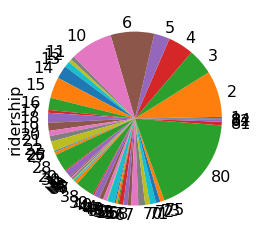

In [26]:
df["ridership"].plot.pie()

In [27]:
ridership = df["ridership"]
ridership = ridership.sort_values(ascending=False)
ridership.head()

Route
80    10211.79
2      4808.03
6      4537.02
10     4425.23
3      2708.55
Name: ridership, dtype: float64

In [28]:
top5 = ridership[:5]
top5

Route
80    10211.79
2      4808.03
6      4537.02
10     4425.23
3      2708.55
Name: ridership, dtype: float64

In [29]:
top5["other"] = ridership[5:].sum()
top5

Route
80       10211.79
2         4808.03
6         4537.02
10        4425.23
3         2708.55
other    29296.56
Name: ridership, dtype: float64

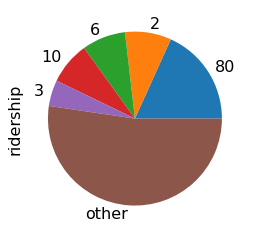

In [30]:
top5.plot.pie()

In [31]:
# SCATTER

In [32]:
# DataFrame.plot.scatter(...)

In [33]:
trees = [
    {"age": 1, "height": 1.5, "diameter": 0.8},
    {"age": 1, "height": 1.9, "diameter": 1.2},
    {"age": 1, "height": 1.8, "diameter": 1.4},
    {"age": 2, "height": 1.8, "diameter": 0.9},
    {"age": 2, "height": 2.5, "diameter": 1.5},
    {"age": 2, "height": 3, "diameter": 1.8},
    {"age": 2, "height": 2.9, "diameter": 1.7},
    {"age": 3, "height": 3.2, "diameter": 2.1},
    {"age": 3, "height": 3, "diameter": 2},
    {"age": 3, "height": 2.4, "diameter": 2.2},
    {"age": 2, "height": 3.1, "diameter": 2.9},
    {"age": 4, "height": 2.5, "diameter": 3.1},
    {"age": 4, "height": 3.9, "diameter": 3.1},
    {"age": 4, "height": 4.9, "diameter": 2.8},
    {"age": 4, "height": 5.2, "diameter": 3.5},
    {"age": 4, "height": 4.8, "diameter": 4},
]

In [34]:
trees = pd.DataFrame(trees)
trees.head()

,age,diameter,height
0,1,0.8,1.5
1,1,1.2,1.9
2,1,1.4,1.8
3,2,0.9,1.8
4,2,1.5,2.5


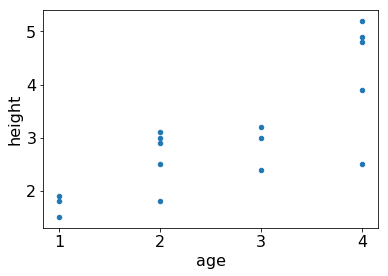

In [35]:
# TODO: add units
# TODO: add title
trees.plot.scatter(x="age", y="height")

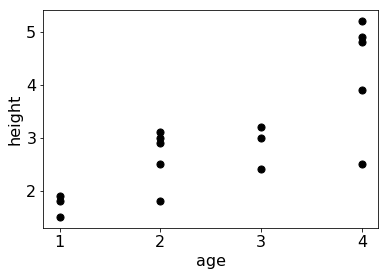

In [36]:
trees.plot.scatter(x="age", y="height", c="black", s=50)

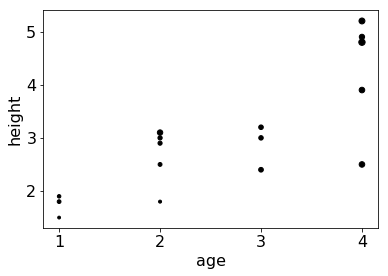

In [37]:
trees.plot.scatter(x="age", y="height",
                   c="black", s=trees["diameter"]*10)

In [38]:
# example 3: iris

In [39]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                 names=["sep-len", "sep-wid", "pet-len", "pet-wid", "class"])
df

,sep-len,sep-wid,pet-len,pet-wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
